# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

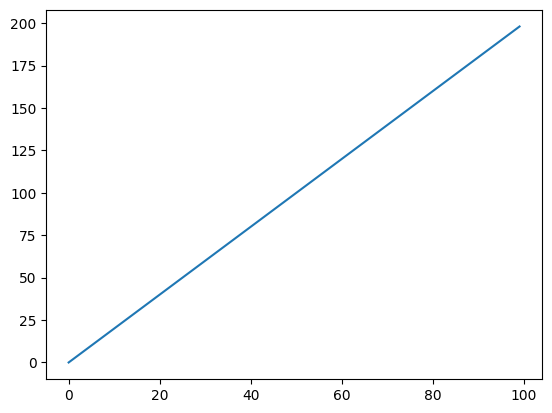

In [3]:
#Implicit API
plt.plot(x,y)

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

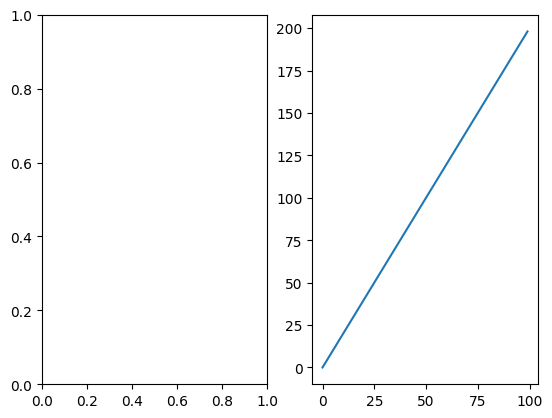

In [4]:
#Explixit API

fig = plt.figure()
ax = fig.subplots(nrows=1,ncols=2)

ax[1].plot(x,y)

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

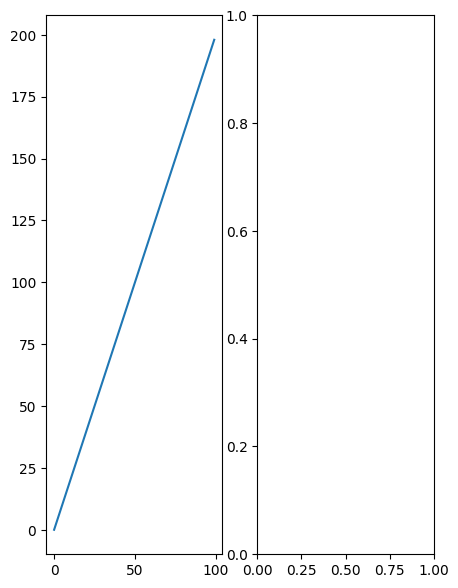

In [5]:
#Explixit API

fig = plt.figure(figsize=(5,7))
ax = fig.subplots(nrows=1,ncols=2)

ax[0].plot(x,y)

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

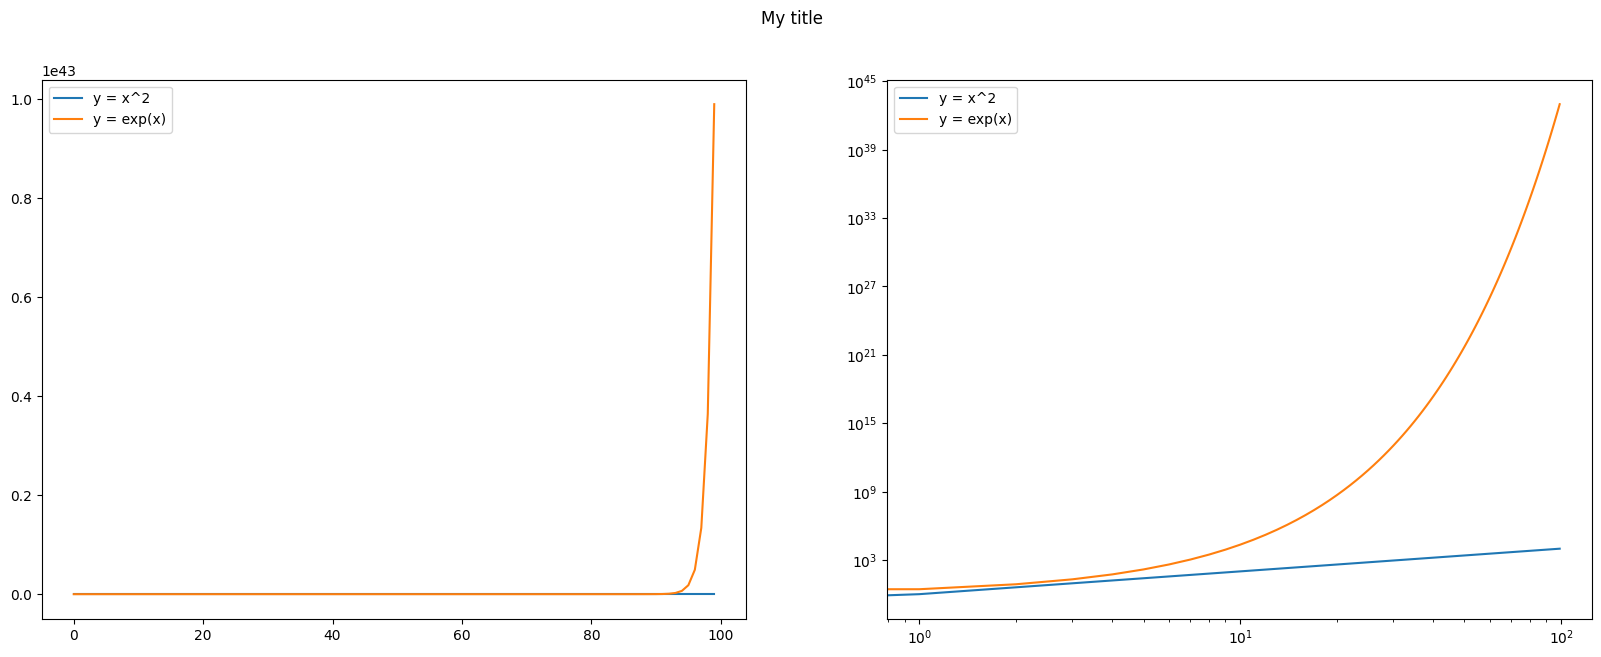

In [6]:
x = np.arange(0,100)
y1 = x**2
y2 = np.exp(x)

fig = plt.figure(figsize=(20,7))
ax = fig.subplots(nrows=1,ncols=2)
fig.suptitle("My title")

ax[0].plot(x,y1, label = "y = x^2")
ax[0].plot(x,y2, label = "y = exp(x)")
ax[0].legend(loc="upper left")


ax[1].plot(x,y1, label = "y = x^2")
ax[1].plot(x,y2, label = "y = exp(x)")
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].legend(loc="upper left")

#### As a bonus challenge, try to add a legend to the plot.

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [7]:
fitbit = pd.read_csv("Fitbit2.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API. -> ie explicit
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

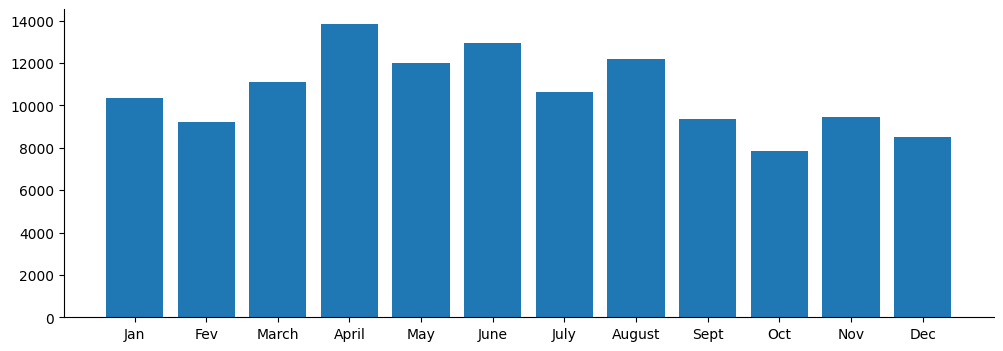

In [8]:
# MEDIAN STEPS BY MONTH_ENCODED
median_month_fitbit = fitbit[["Months_encoded","Steps"]].groupby(by="Months_encoded").median()

x = list(median_month_fitbit.index)
y = list(median_month_fitbit["Steps"].values)


fig = plt.figure(figsize=(12,4))
ax = fig.subplots()

median_month_fitbit.index

ax.bar(x,y)
plt.sca(ax) # La fonction plt.sca() (Set Current Axes) est une fonction de Matplotlib qui permet de définir explicitement l'axe courant (Current Axes) sur lequel les futures opérations de tracé seront effectuées avec l'API Pyplot.


# # Personnaliser les marques (ticks) sur l'axe des abscisses (axe x)
custom_ticks = [1,2,3,4,5,6,7,8,9,10,11,12]  # Positions personnalisées pour les marques
custom_labels = ["Jan","Fev","March","April","May","June","July","August","Sept","Oct","Nov","Dec"]  # Étiquettes associées aux marques

plt.xticks(custom_ticks, custom_labels)  # Définir les marques personnalisées

# Supprimer le contour de la figure
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

([<matplotlib.axis.XTick at 0x1259a6140>,
 [Text(0, 0, 'Week-end'), Text(1, 0, 'Workday')])

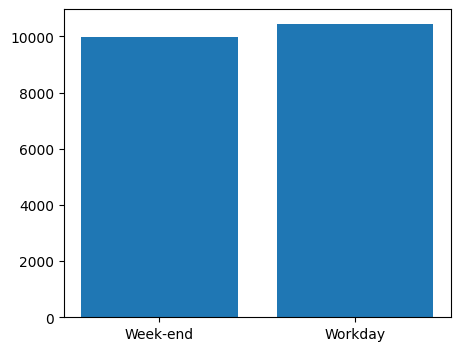

In [9]:
# MEDIAN STEPS BY WORK_OR_WEEKEND

median_step_week = fitbit[["Work_or_Weekend","Steps"]].groupby(by="Work_or_Weekend").median()


x = list(median_step_week.index)
y = list(median_step_week["Steps"].values)

fig = plt.figure(figsize=(5,4))
ax = fig.subplots()

ax.bar(x,y)# # Personnaliser les marques (ticks) sur l'axe des abscisses (axe x)
custom_ticks = [0,1]  # Positions personnalisées pour les marques
custom_labels = ["Week-end","Workday"]  # Étiquettes associées aux marques

plt.xticks(custom_ticks, custom_labels)  # Définir les marques personnalisées

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

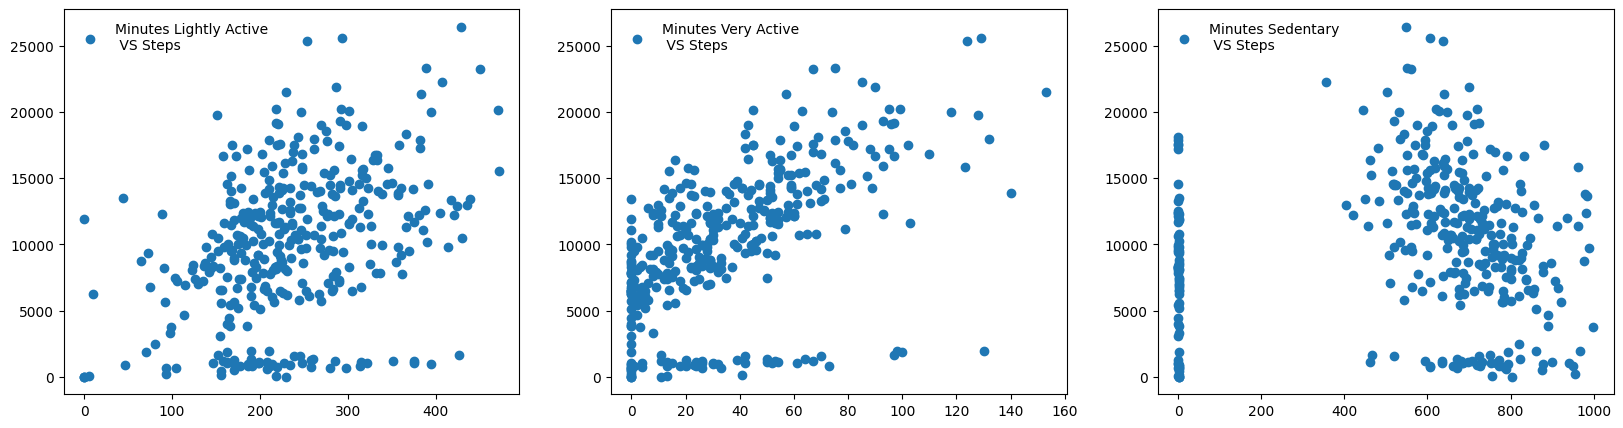

In [10]:
fitbit.head()

x_columns = ["Minutes Lightly Active","Minutes Very Active","Minutes Sedentary"]

fig = plt.figure(figsize=(20,5))
ax = fig.subplots(nrows=1,ncols=3)

for curr_ax,curr_x in zip(ax,x_columns) : 
    curr_ax.scatter(fitbit[curr_x],fitbit["Steps"], label = curr_x + "\n VS Steps")
    curr_ax.legend(loc = "upper left", edgecolor = "white", framealpha = 1)




## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [11]:
titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [12]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

##### NUMERICAL VARIABLES
PassengerId, Survived, Age, Fare

##### CATEGORICAL VARIABLES
Pclass, Gender, SibSp, Parch, Embarked

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [13]:
# mpl.style.use('classic')
fig = plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

(array([ 72.,  78., 326., 347., 220., 136.,  75.,  42.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <BarContainer object of 10 artists>)

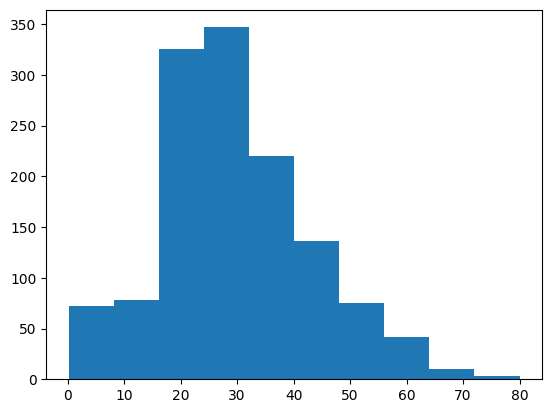

In [14]:
fig, ax = plt.subplots()
ax.hist(titanic["Age"]) #Quand on utilise hist() la fréquence est calculé par elle même, PAS BESOIN DE .countvalues()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

(array([ 22.,  19.,  10.,  11.,  10.,  13.,   8.,   8.,  23.,  26.,  20.,
         75.,  29.,  93., 109.,  43.,  72.,  68., 111.,  53.,  71.,  47.,
         35.,  24.,  43.,  26.,  29.,  15.,  35.,  31.,  15.,  26.,   7.,
         14.,  13.,   5.,   9.,   8.,  11.,   9.,   3.,   2.,   0.,   2.,
          3.,   0.,   1.,   1.,   0.,   1.]),
 array([ 0.17  ,  1.7666,  3.3632,  4.9598,  6.5564,  8.153 ,  9.7496,
        11.3462, 12.9428, 14.5394, 16.136 , 17.7326, 19.3292, 20.9258,
        22.5224, 24.119 , 25.7156, 27.3122, 28.9088, 30.5054, 32.102 ,
        33.6986, 35.2952, 36.8918, 38.4884, 40.085 , 41.6816, 43.2782,
        44.8748, 46.4714, 48.068 , 49.6646, 51.2612, 52.8578, 54.4544,
        56.051 , 57.6476, 59.2442, 60.8408, 62.4374, 64.034 , 65.6306,
        67.2272, 68.8238, 70.4204, 72.017 , 73.6136, 75.2102, 76.8068,
        78.4034, 80.    ]),
 <BarContainer object of 50 artists>)

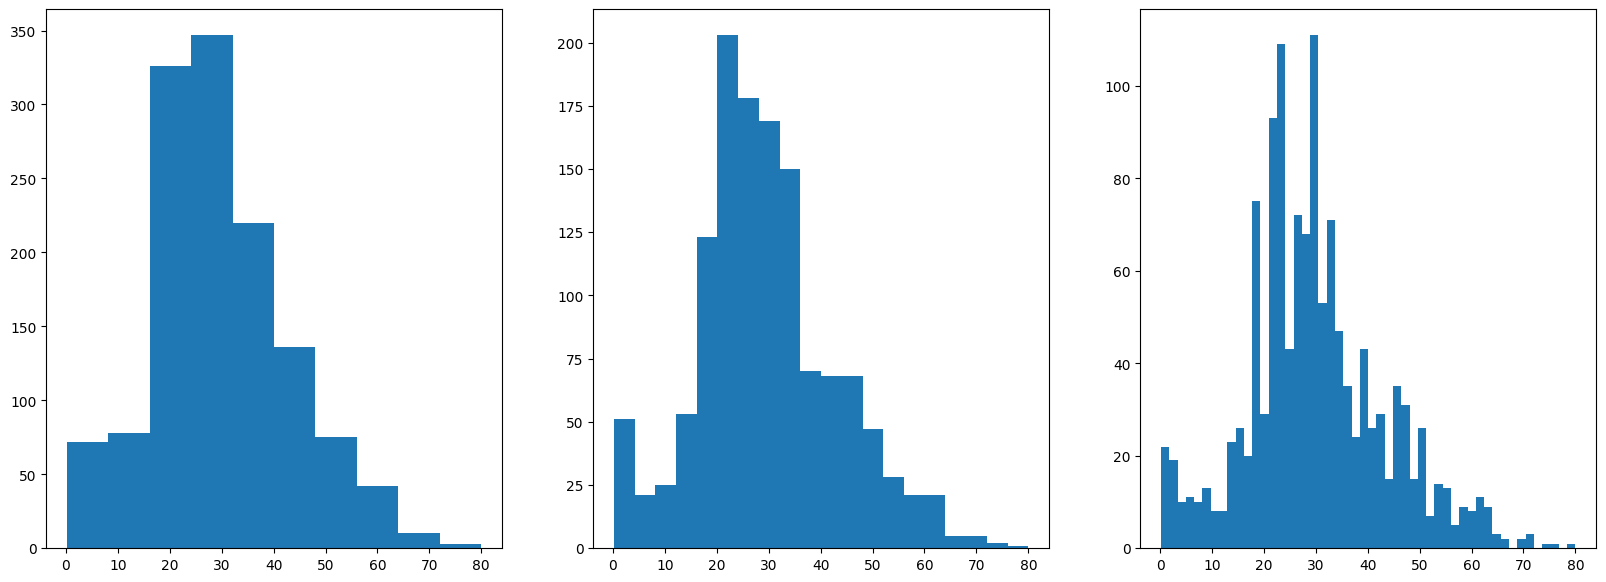

In [15]:
fig = plt.figure(figsize=(20,7))
axs = fig.subplots(ncols=3)

axs[0].hist(titanic["Age"], bins = 10)
axs[1].hist(titanic["Age"], bins = 20)
axs[2].hist(titanic["Age"], bins = 50)

#### How does the bin size affect your plot?

In [16]:
"""
your comments here
"""

'\nyour comments here\n'

#### Use seaborn to show the distribution of column `Age`.

<Axes: xlabel='Age', ylabel='Count'>

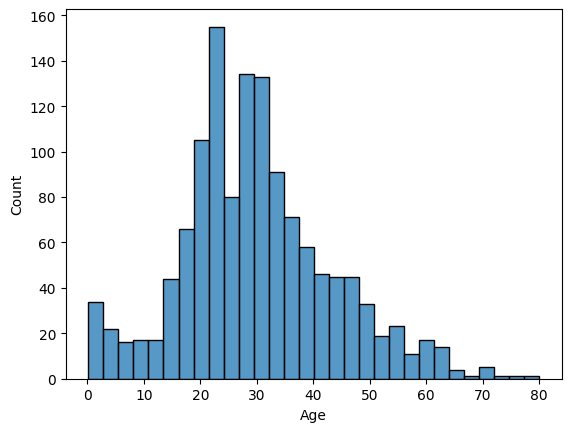

In [17]:
sns.histplot(titanic["Age"])

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<BarContainer object of 2 artists>

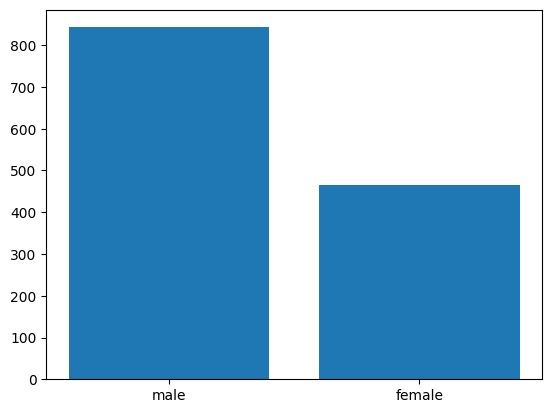

In [18]:
# Method 1 - matplotlib
fig = plt.figure()
ax = fig.subplots()

x = ["male","female"]
y = list(titanic["Gender"].value_counts().values)

ax.bar(x,y)

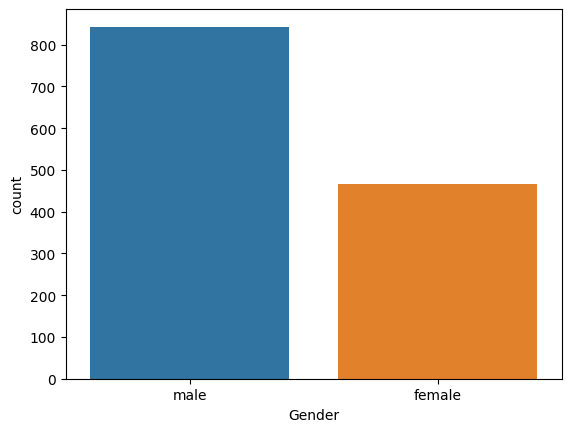

In [19]:
# Method 2 - seaborn

# Best way 
sns.countplot(titanic, x= "Gender")

#Worst
gender_count = titanic["Gender"].value_counts()
gender_count_df = pd.DataFrame(gender_count)
ax = sns.barplot(gender_count_df, x = gender_count_df.index.values, y = gender_count.values)


#### Use the right plot to visualize the column `Pclass`.

<Axes: xlabel='Pclass', ylabel='count'>

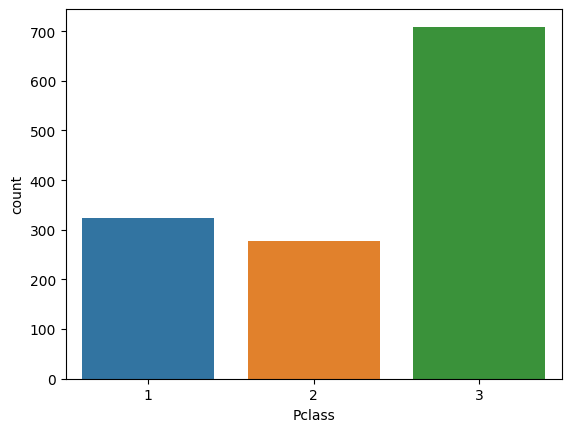

In [20]:
sns.countplot(titanic, x= "Pclass")


#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

<Axes: xlabel='Age'>

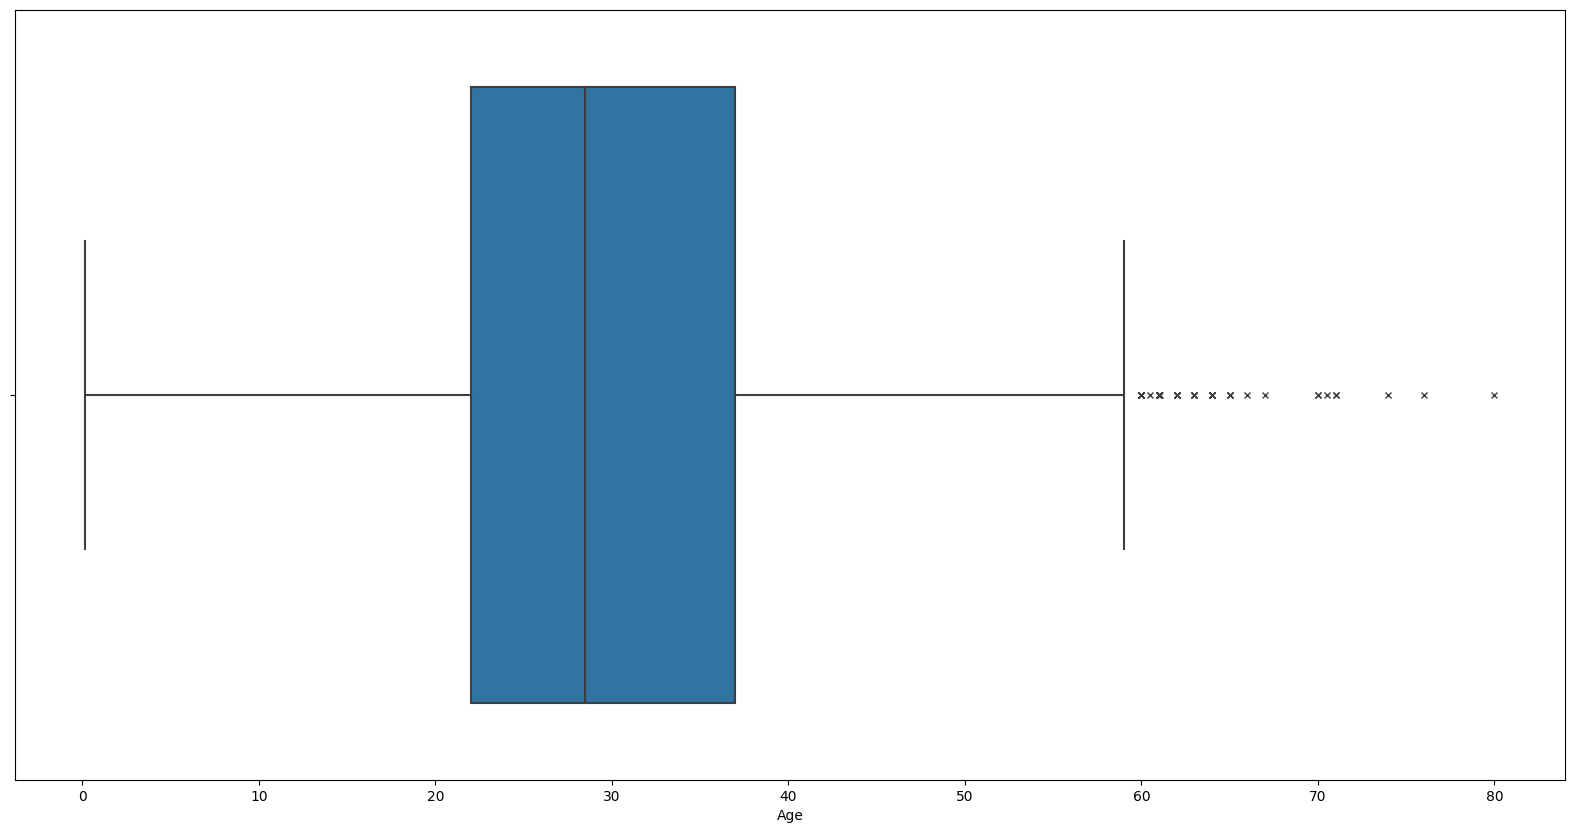

In [21]:
fig = plt.figure(figsize=(20,10))
sns.boxplot(titanic, x = "Age", flierprops={"marker": "x"})

In [22]:
"""
your comments here
"""

'\nyour comments here\n'

#### What does the last plot tell you about the feature `Age`?

In [23]:
"""
your comments here
"""

'\nyour comments here\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

<Axes: xlabel='Age'>

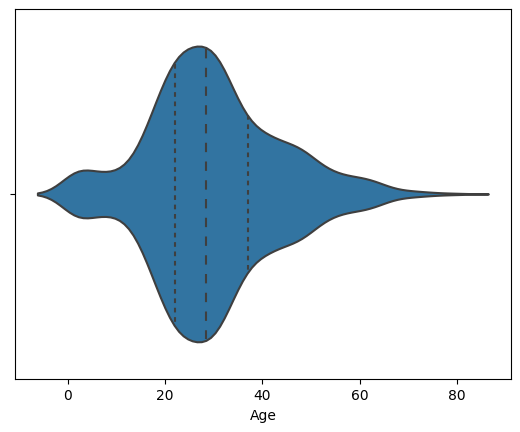

In [24]:
sns.violinplot(titanic,x="Age", inner = "quartile")

#### What additional information does the last plot provide about feature `Age`?

In [25]:
"""
your comments here
"""

'\nyour comments here\n'

In [26]:
titanic[["Fare","Age"]]

,Fare,Age
0,7.2500,22.000000
1,71.2833,38.000000
2,7.9250,26.000000
3,53.1000,35.000000
4,8.0500,35.000000
...,...,...
1304,8.0500,29.513190
1305,108.9000,39.000000
1306,7.2500,38.500000
1307,8.0500,29.513190


#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

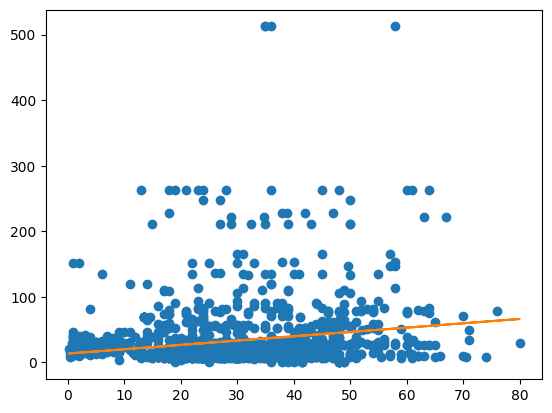

In [27]:
# Method 1 - matplotlib
x = titanic["Age"]
y = titanic["Fare"]


#create basic scatterplot
plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)

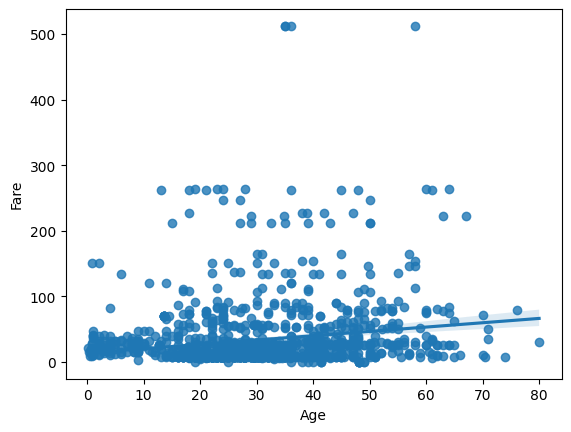

In [28]:
# Method 2 - seaborn
corr = titanic[["Fare","Age"]].corr()

sns.regplot(data = titanic, x="Age", y="Fare");



#### Plot the correlation matrix using seaborn.

<Axes: >

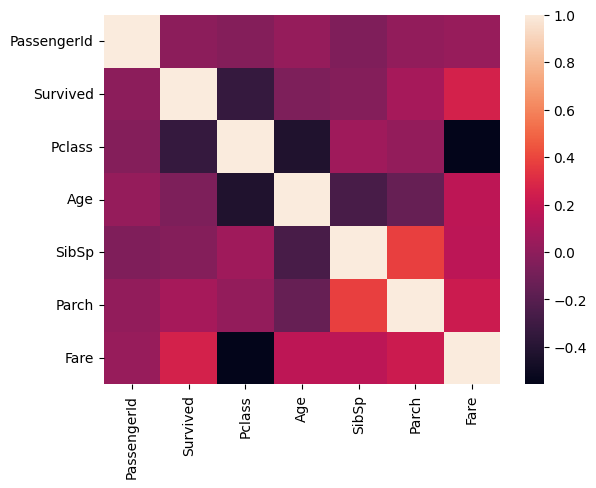

In [29]:
corr = titanic[["PassengerId","Survived","Pclass","Age","SibSp","Parch","Fare"]].corr()

sns.heatmap(corr)

#### What are the most correlated features?

Parch and SibSp

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

/Users/dogmael/anaconda3/envs/bootcamp/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/dogmael/anaconda3/envs/bootcamp/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


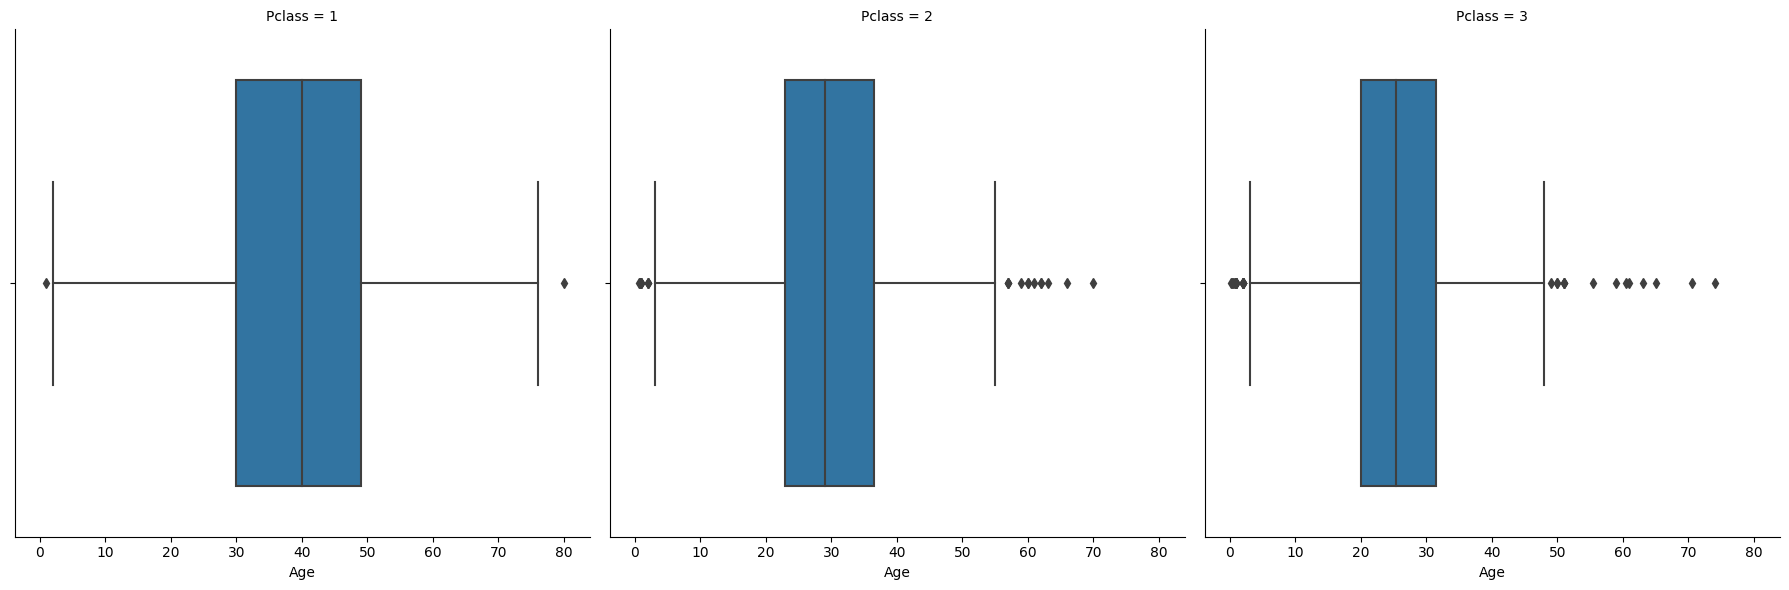

In [30]:
g = sns.FacetGrid(data=titanic,col="Pclass", height=6)
g.map(sns.boxplot, "Age")


#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

/Users/dogmael/anaconda3/envs/bootcamp/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


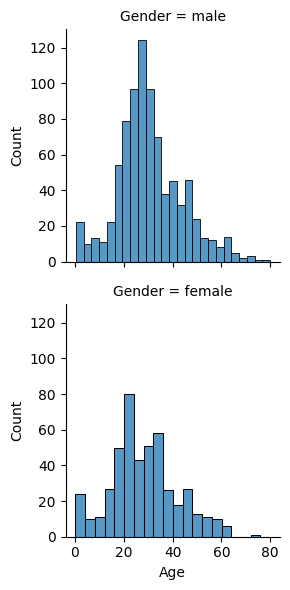

In [31]:
g = sns.FacetGrid(data=titanic,row="Gender")
g.map(sns.histplot, "Age")
